# **ETL y EDA**

Se está importando diversas bibliotecas y módulos necesarios para el análisis y la visualización de datos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import numpy as np

Cargar el archivo CSV que contiene las características del top 10 de criptomonedas en un DataFrame.

In [3]:
data_cryptos = pd.read_csv('Dataset//caracteristicas_cryptos.csv')

In [4]:
data_cryptos

,id,símbolo,nombre,precio_actual,capitalización_mercado,rango_capitalización_mercado,suministro_total,dominio_mercado
0,bitcoin,btc,Bitcoin,"$29,361.39","$571,267,754,769.00",1,"$21,000,000.00",46.90
1,ethereum,eth,Ethereum,"$1,843.49","$221,434,517,577.00",2,"$120,144,363.74",18.18
2,binancecoin,bnb,BNB,$240.15,"$36,958,957,222.00",4,"$153,856,150.00",3.03
3,solana,sol,Solana,$24.86,"$10,095,982,592.00",10,"$554,933,656.84",0.83
4,matic-network,matic,Polygon,$0.68,"$6,331,103,280.00",12,"$10,000,000,000.00",0.52
5,polkadot,dot,Polkadot,$4.98,"$6,300,160,350.00",13,"$1,345,287,496.75",0.52
6,avalanche-2,avax,Avalanche,$12.33,"$4,240,227,108.00",20,"$430,547,431.69",0.35
7,chainlink,link,Chainlink,$7.44,"$4,005,344,544.00",21,"$1,000,000,000.00",0.33
8,aave,aave,Aave,$65.60,"$951,791,401.00",46,"$16,000,000.00",0.08
9,algorand,algo,Algorand,$0.12,"$900,673,420.00",47,"$7,812,954,146.58",0.07


Cargar el archivo CSV con la data histórica de precios de las criptomonedas con las que vamos a trabajar en un DataFrame.

In [5]:
data_price = pd.read_csv('Dataset//data_price.csv')

Se convierten los valores en la columna "Fecha" en objetos de tipo datetime y luego se extrae exclusivamente la porción de la fecha, eliminando así la información detallada de la hora del día.

In [6]:
# Suponiendo que 'Fecha' es una columna en formato de cadena de texto
data_price['Fecha'] = pd.to_datetime(data_price['Fecha']).dt.date

In [7]:
data_price

,Fecha,Bitcoin,Ethereum,Binance Coin,Aave,Solana,Polkadot,Chainlink,Avalanche,Algorand,Polygon
0,2013-04-28,135.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2013-04-29,141.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2013-04-30,135.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2013-05-01,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2013-05-02,103.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
3758,2023-08-06,29046.80,1835.07,242.88,64.37,22.63,4.97,7.22,12.43,0.11,0.67
3759,2023-08-07,29044.20,1826.71,242.57,65.76,23.16,4.99,7.09,12.56,0.11,0.67
3760,2023-08-08,29178.15,1826.93,241.74,64.85,23.05,4.96,7.28,12.45,0.11,0.66
3761,2023-08-09,29779.56,1856.84,245.18,66.29,24.20,5.06,7.45,12.69,0.11,0.69


---

### **Comportamiento de Criptomonedas a lo Largo del Tiempo**

Se generan gráficos que representan el comportamiento de diferentes criptomonedas a lo largo del tiempo. Cada criptomoneda se muestra en un subplot individual en una cuadrícula, con su precio trazado en función de la fecha.

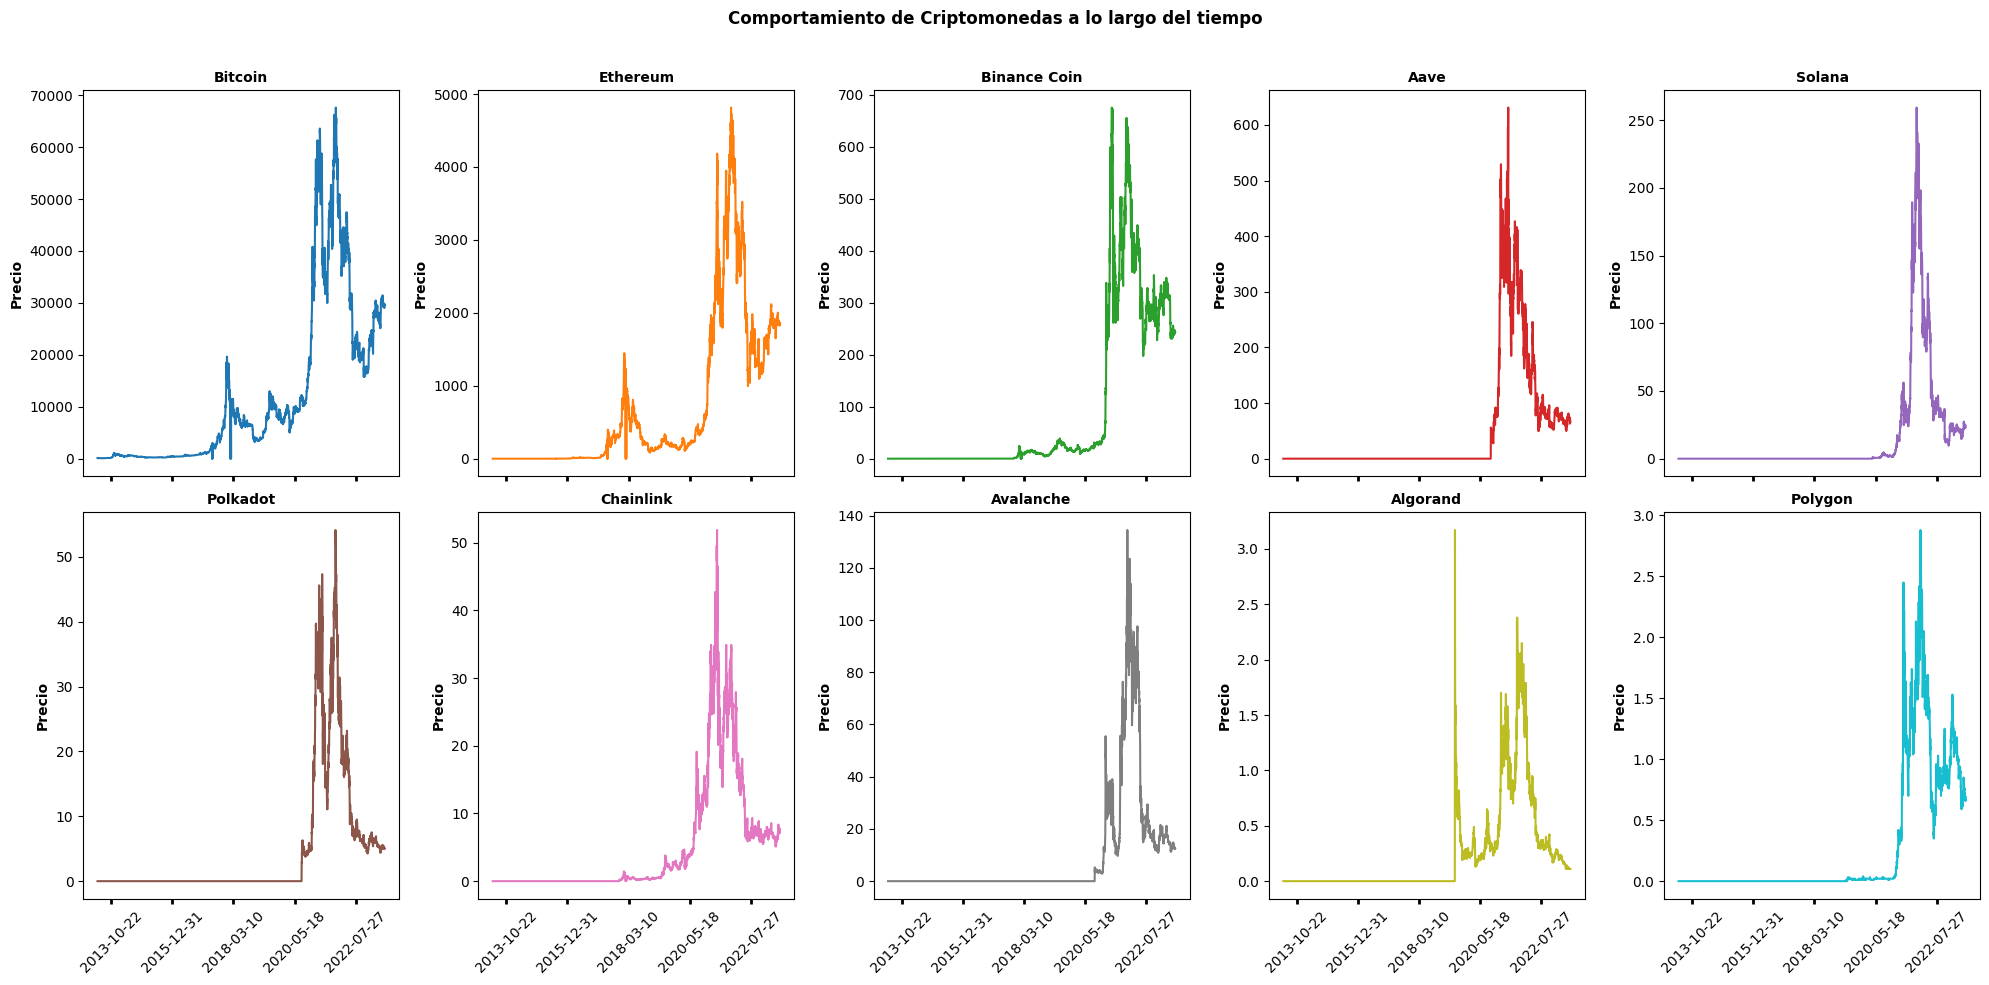

In [8]:
# Definir el DataFrame 'data' y las criptomonedas a graficar
cryptocurrencies = ['Bitcoin', 'Ethereum', 'Binance Coin', 'Aave', 'Solana', 'Polkadot', 'Chainlink', 'Avalanche', 'Algorand', 'Polygon']

# Calcular el número de filas y columnas necesarias para la disposición de subplots
num_cryptocurrencies = len(cryptocurrencies)
num_cols = 5
num_rows = -(-num_cryptocurrencies // num_cols)  # Redondeo hacia arriba

# Configurar subplots en una cuadrícula de 3 columnas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows), sharex=True)

# Aplanar el arreglo de ejes para iterar sobre ellos
axes = axes.flatten()

# Utilizar una paleta de colores para asignar colores diferentes a cada línea
palette = sns.color_palette('tab10', n_colors=num_cryptocurrencies)

# Definir propiedades de fuente en negrita
font_properties = FontProperties(weight='bold')

# Iterar a través de las criptomonedas y graficar cada una en su subplot correspondiente
for i, cryptocurrency in enumerate(cryptocurrencies):
    if i < num_cryptocurrencies:  # Manejar el caso en que hay menos criptomonedas que subplots
        axes[i].plot(data_price['Fecha'], data_price[cryptocurrency], color=palette[i])
        axes[i].set_title(cryptocurrency, fontproperties=font_properties)
        axes[i].set_ylabel('Precio', fontproperties=font_properties)
        axes[i].tick_params(axis='x', rotation=45, labelsize='medium', labelcolor='black', width=2)  # Estilo de etiquetas
        axes[i].xaxis.set_major_locator(plt.MaxNLocator(6))  # Limitar el número de etiquetas en el eje x

# Ajustar los espacios entre subplots y entre las filas de subplots
plt.tight_layout()

# Agregar título a la gráfica en negrita
plt.suptitle('Comportamiento de Criptomonedas a lo largo del tiempo', fontweight='bold')

# Ajustar el espacio entre el título principal y las gráficas
plt.subplots_adjust(top=0.9)

# Mostrar el gráfico
plt.show()


### **Análisis del Comportamiento de Criptomonedas a lo Largo del Tiempo**

1. **Visualización de Tendencias Individuales**: La representación gráfica muestra el comportamiento de diferentes criptomonedas a lo largo del tiempo en subplots individuales. Al observar las líneas de las criptomonedas en relación con la línea de tiempo, es posible identificar tendencias y patrones específicos para cada una.

2. **Variación en los Precios**: La gráfica refleja la diversidad en los precios de las criptomonedas presentadas. Algunas criptomonedas tienen valores significativamente más altos que otras, lo que sugiere diferencias en la adopción, demanda y percepción de valor en el mercado.

3. **Tendencias de Crecimiento y Volatilidad**: La visualización destaca cómo algunas criptomonedas han experimentado un crecimiento sostenido a lo largo del tiempo, mientras que otras muestran mayor volatilidad con fluctuaciones notables en sus precios. Estas diferencias pueden estar influenciadas por factores como la adopción, eventos de la industria y la liquidez del mercado.

4. **Identificación de Cambios**: Las líneas trazadas en los subplots pueden revelar cambios en la tendencia del precio de una criptomoneda específica. Es posible identificar períodos de aumento, estabilidad o disminución en el valor, lo que puede ser el resultado de eventos internos o externos que afectan el mercado.

5. **Comparativa del Rendimiento**: Al observar las criptomonedas en un solo lugar, es posible realizar una comparación directa de su rendimiento relativo. Esto facilita la comprensión de cuáles criptomonedas han experimentado un crecimiento más rápido, cuáles han mantenido precios estables y cuáles han mostrado mayor volatilidad durante un período específico.

6. **Profundización en los Movimientos de Precios**: La visualización resalta la importancia de investigar más allá de los números para comprender los eventos y factores que impulsan los cambios en los precios. Los movimientos de precios pueden estar relacionados con anuncios importantes, actualizaciones técnicas, adopción por parte de socios comerciales y otros factores que no son inmediatamente visibles en la gráfica.

7. **Predicción de Precios**: La volatilidad y las variaciones en los patrones de precios entre las criptomonedas subrayan las dificultades asociadas con la predicción precisa de los precios en el mercado de criptomonedas. Dado que cada criptomoneda es influenciada por su propia dinámica y factores únicos, lograr una predicción precisa requiere un análisis exhaustivo y una comprensión completa.

8. **Impacto de Eventos Clave**: Al observar las tendencias a lo largo del tiempo para varias criptomonedas, es posible obtener una visión más completa de cómo ha evolucionado el mercado de criptomonedas. Eventos significativos, como el halving de Bitcoin o la adopción institucional, pueden haber influido en la forma en que las criptomonedas se comportan en diferentes momentos.

*En resumen, la visualización proporciona una instantánea útil del comportamiento histórico de diferentes criptomonedas. Sin embargo, es importante recordar que la interpretación de los movimientos de precios debe complementarse con una comprensión profunda de los factores económicos, tecnológicos y regulatorios que afectan a cada criptomoneda.*

---

### **Correlaciones entre Criptomonedas**

Convertir la columna "Fecha" a formato DateTime y establecerla como índice

In [9]:
data_price["Fecha"] = pd.to_datetime(data_price["Fecha"])
data_price.set_index("Fecha", inplace=True)

Se calculan las diferencias diarias (retornos) para cada criptomoneda utilizando los datos de precio proporcionados. Luego, se calcula una matriz de correlación entre estos retornos diarios de las criptomonedas. Para visualizar esta matriz de correlación, se crea un mapa de calor con colores que indican el nivel de correlación entre las criptomonedas. 

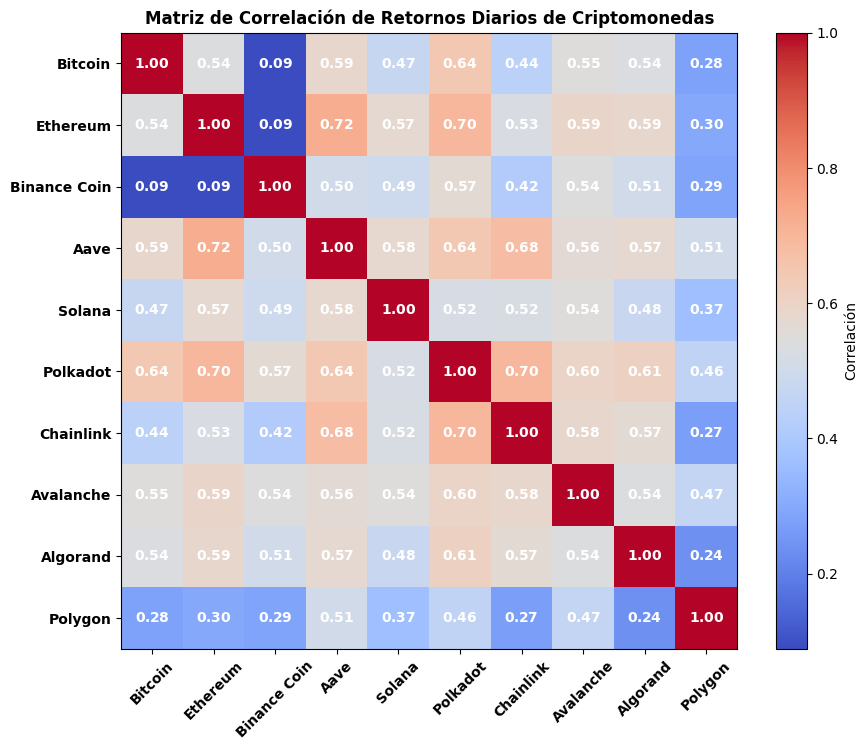

In [10]:
# Calcular las diferencias diarias (retornos) para cada criptomoneda
daily_returns = data_price.pct_change()

# Calcular la matriz de correlación entre los retornos diarios de las criptomonedas
correlation_matrix = daily_returns.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Agregar los valores de correlación en cada cuadro del mapa de calor (en negrita)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, r'$\mathbf{%.2f}$' % correlation_matrix.iloc[i, j], ha='center', va='center', color='white', weight='bold')

plt.colorbar(label='Correlación')
plt.title('Matriz de Correlación de Retornos Diarios de Criptomonedas', weight='bold')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45, weight='bold')
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, weight='bold')
plt.show()


Se genera un DataFrame que contiene la matriz de correlación calculada previamente. Cada fila y columna del DataFrame representa una criptomoneda, y los valores en la intersección de las filas y columnas indican la correlación entre los retornos diarios de las criptomonedas correspondientes. 

In [11]:
# Crear un DataFrame a partir de la matriz de correlación
correlation_df = pd.DataFrame(correlation_matrix, columns=data_price.columns, index=data_price.columns)

# Redondear los valores de la matriz de correlación a 2 decimales
correlation_df = correlation_df.round(2)

# Visualizar el DataFrame de correlación
correlation_df

,Bitcoin,Ethereum,Binance Coin,Aave,Solana,Polkadot,Chainlink,Avalanche,Algorand,Polygon
Bitcoin,1.00,0.54,0.09,0.59,0.47,0.64,0.44,0.55,0.54,0.28
Ethereum,0.54,1.00,0.09,0.72,0.57,0.70,0.53,0.59,0.59,0.30
Binance Coin,0.09,0.09,1.00,0.50,0.49,0.57,0.42,0.54,0.51,0.29
Aave,0.59,0.72,0.50,1.00,0.58,0.64,0.68,0.56,0.57,0.51
Solana,0.47,0.57,0.49,0.58,1.00,0.52,0.52,0.54,0.48,0.37
Polkadot,0.64,0.70,0.57,0.64,0.52,1.00,0.70,0.60,0.61,0.46
Chainlink,0.44,0.53,0.42,0.68,0.52,0.70,1.00,0.58,0.57,0.27
Avalanche,0.55,0.59,0.54,0.56,0.54,0.60,0.58,1.00,0.54,0.47
Algorand,0.54,0.59,0.51,0.57,0.48,0.61,0.57,0.54,1.00,0.24
Polygon,0.28,0.30,0.29,0.51,0.37,0.46,0.27,0.47,0.24,1.00


In [13]:
# Guardar el DataFrame en un archivo CSV
correlation_df.to_csv('Dataset//KPI´s//Índice de correlación.csv', index=True)

### **Análisis de Correlaciones entre Criptomonedas**

Basándonos en el análisis de correlación entre diferentes criptomonedas, se pueden extraer conclusiones clave que respaldan la idea de que estas criptomonedas podrían ser una buena opción de inversión:

1. **Diversificación Efectiva**: Las correlaciones moderadas entre Bitcoin y Ethereum, así como entre Ethereum y otras criptomonedas como Aave y Polkadot, sugieren que estas monedas tienen una tendencia a moverse en conjunto en ciertas ocasiones. Esto podría permitir una estrategia de diversificación efectiva, donde la inversión en estas criptomonedas podría ayudar a mitigar el riesgo al compartir movimientos de precios similares.

2. **Aprovechamiento de Tendencias Emergentes**: Al identificar correlaciones más altas, como la de Ethereum y Aave, es posible aprovechar tendencias emergentes o eventos específicos que afecten a ambas monedas. Si una criptomoneda específica muestra un rendimiento excepcional debido a una noticia o innovación, es posible que veamos impactos positivos en otras monedas con correlaciones significativas.

3. **Cobertura y Equilibrio**: La baja correlación entre Binance Coin y Bitcoin o Ethereum sugiere que estas criptomonedas podrían actuar como activos de cobertura o equilibrio en una cartera. En momentos de alta volatilidad del mercado, donde Bitcoin y Ethereum pueden ser más volátiles, Binance Coin podría tener un comportamiento más independiente y proporcionar cierta estabilidad a la cartera.

4. **Oportunidades para la Diversificación Adicional**: La baja correlación de Polygon con muchas otras criptomonedas abre la puerta a oportunidades de diversificación adicional. Al incluir Polygon en una cartera junto con otras monedas, podríamos aprovechar las diferencias en los movimientos de precios y mitigar el riesgo al no depender completamente de las tendencias de una sola criptomoneda.

5. **Consideración de Objetivos y Estrategias**: Las correlaciones entre criptomonedas brindan una base para considerar qué criptomonedas se ajustan mejor a tus objetivos de inversión y estrategias. Si buscas exposición a las principales tendencias del mercado, Bitcoin y Ethereum podrían ser fundamentales. Si estás interesado en innovaciones tecnológicas más específicas, las correlaciones con criptomonedas como Aave o Polkadot pueden influir en tu elección.

En última instancia, la diversificación y el equilibrio en una cartera de criptomonedas son fundamentales para gestionar el riesgo y aprovechar las oportunidades. Las correlaciones pueden proporcionar una guía valiosa para tomar decisiones informadas y construir una cartera que refleje tus objetivos y tolerancia al riesgo. Recuerda que las condiciones del mercado pueden cambiar, por lo que es importante mantenerse actualizado y ajustar tu estrategia según sea necesario.


---

### **Comportamiento de los Precios Máximos de Criptomonedas**


Se calculan los valores máximos de precio para cada criptomoneda por año a partir de los datos históricos de precios. Luego, se realiza una representación gráfica de estos valores máximos en subplots organizados en una cuadrícula de 5 columnas y 2 filas. Cada subplot muestra la variación de los valores máximos de una criptomoneda a lo largo de los años.

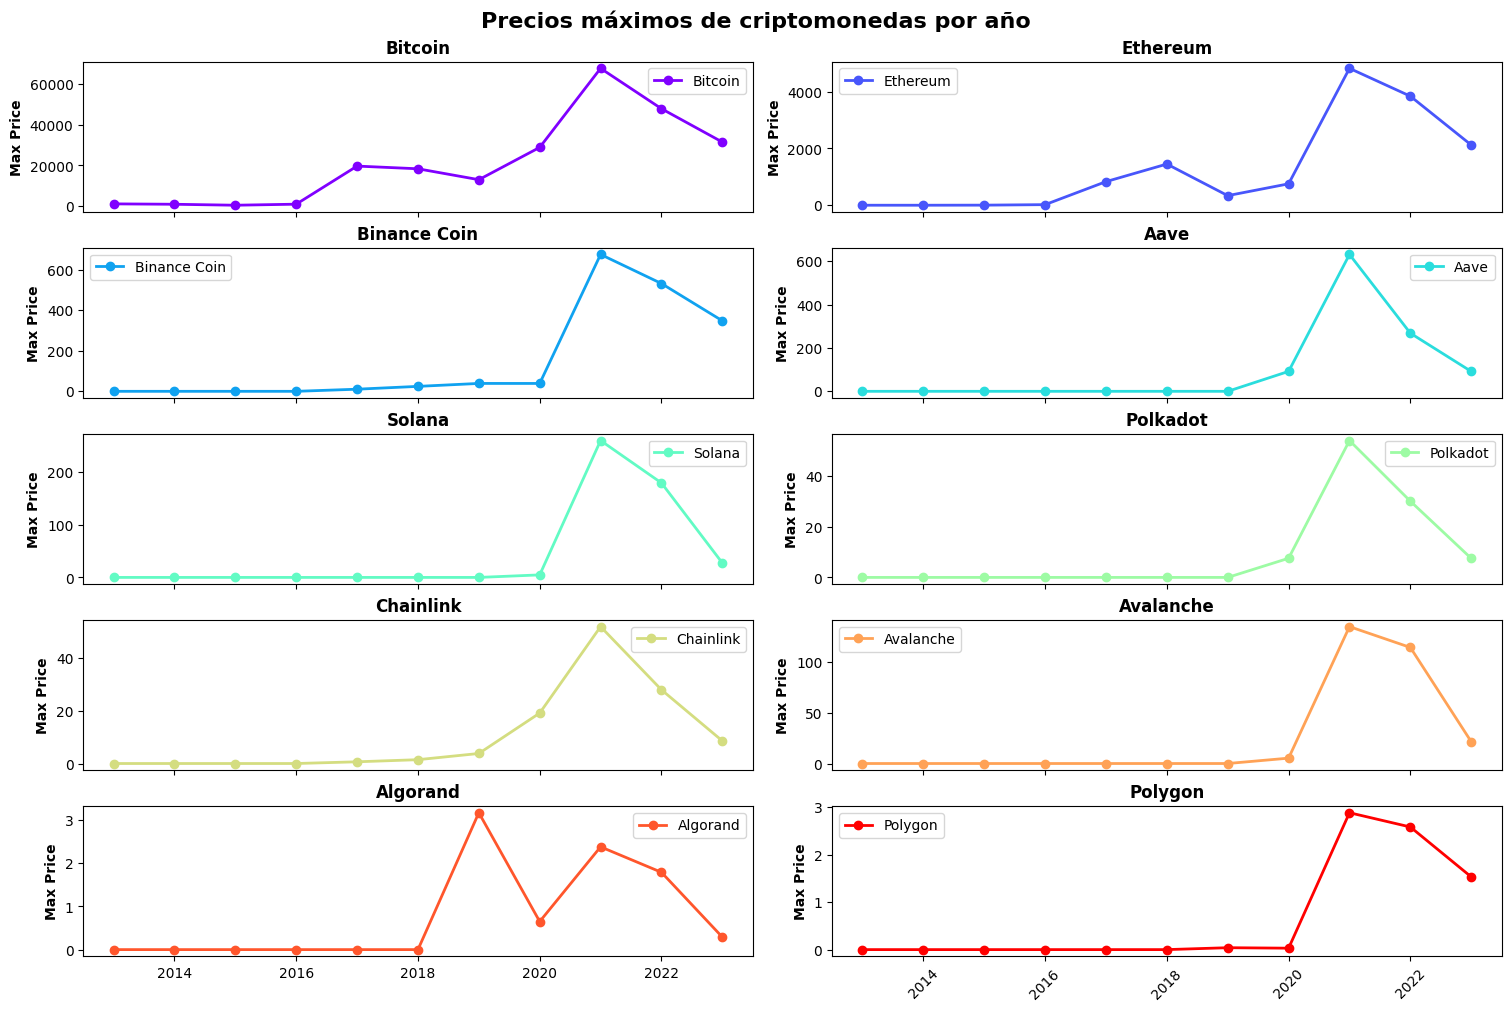

In [490]:
# Calcular los valores máximos de cada criptomoneda por año
max_values_by_year = data_price.resample('Y').max()

# Obtener el número de criptomonedas
num_cryptos = len(max_values_by_year.columns)

# Crear subplots con 5 columnas y 2 filas
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharex=True, constrained_layout=True)

# Convertir la matriz de subplots en un arreglo unidimensional para facilitar el indexado
axes = axes.ravel()

# Colores para cada criptomoneda
colors = plt.cm.rainbow(np.linspace(0, 1, num_cryptos))

# Graficar los valores máximos de cada criptomoneda por año en su propio subplot
for i, column in enumerate(max_values_by_year.columns):
    ax = axes[i]
    ax.plot(max_values_by_year.index.year, max_values_by_year[column], color=colors[i], marker='o', linestyle='-', linewidth=2, markersize=6, label=column)
    ax.set_ylabel('Max Price', fontweight='bold')
    ax.set_title(column, fontweight='bold')
    ax.legend()

# Ajustar el diseño para que los valores del eje x no se superpongan
plt.xticks(rotation=45)

# Título general
plt.suptitle('Precios máximos de criptomonedas por año', fontsize=16, fontweight='bold')

plt.show()

### **Análisis de Comportamiento de los Precios Máximos de Criptomonedas**

**1. Repunte en Precios en el 2020**

La gráfica muestra un **notable repunte en los precios de todas las criptomonedas** alrededor del año 2020. Este fenómeno puede atribuirse a varios factores, como la creciente adopción de criptomonedas por parte de negocios y personas durante la pandemia de COVID-19. La crisis sanitaria generó un aumento en la conciencia sobre las finanzas digitales, lo que llevó a una mayor demanda de activos digitales alternativos como refugio de valor y medios de pago. Además, la disminución de las tasas de interés y las políticas monetarias expansivas impulsaron la búsqueda de inversiones alternativas, incluidas las criptomonedas.

**2. Causas del Repunte en el 2020**

Durante el 2020, hubo varios eventos que impactaron el aumento de precios de las criptomonedas. Entre estos eventos se destacan los siguientes:
- **Adopción Institucional**: Grandes instituciones financieras comenzaron a mostrar interés y a invertir en criptomonedas como reserva de valor, lo que proporcionó una nueva forma de validación y confianza en el mercado.
- **Halving de Bitcoin**: En mayo de 2020, ocurrió el tercer "halving" de Bitcoin, un evento programado que reduce a la mitad las recompensas para los mineros. Esto históricamente ha llevado a una escasez artificial de suministro, lo que contribuyó al aumento del precio de Bitcoin.
- **Mayor Exposición Mediática**: Las criptomonedas obtuvieron una mayor cobertura mediática durante este período, lo que aumentó la conciencia pública y atrajo a nuevos inversores y usuarios.

**3. Caída de Precios a Finales de 2021**

A finales del 2021, se observa una **disminución significativa en los precios de las criptomonedas**. Esta caída puede deberse a una serie de factores:
- **Regulación y Escrutinio**: Los gobiernos y reguladores de varios países comenzaron a tomar medidas para regular las criptomonedas, lo que generó incertidumbre y volatilidad en el mercado.
- **Exceso de Especulación**: La alta volatilidad y los rápidos aumentos de precios llevaron a una especulación excesiva, lo que hizo que algunos inversores tomaran ganancias y causara una corrección en los precios.
- **Toma de Ganancias**: Después de un período prolongado de ganancias, es común que los inversores decidan tomar ganancias y liquidar algunas de sus inversiones, lo que puede conducir a una corrección del mercado.

**4. Investigación sobre la Caída**

Dado el patrón observado en la gráfica, se podría haber realizado **una investigación más profunda para comprender mejor las causas detrás de la caída en los precios a finales del 2021**. Esta investigación podría haber involucrado análisis de noticias, eventos regulatorios y movimientos macroeconómicos que podrían haber influido en la confianza de los inversores y en la percepción del mercado.

**5. Importancia de la Investigación Contextual**

La visualización de la gráfica subraya la importancia de llevar a cabo **investigaciones más allá de la superficie** para comprender los eventos que influyen en el mercado de criptomonedas. Las correlaciones observadas en los datos pueden servir como puntos de partida para análisis más profundos que ayuden a los inversores y analistas a tomar decisiones informadas.

**6. Cambio en la Percepción del Mercado**

Los cambios en los precios de las criptomonedas a lo largo del tiempo también resaltan cómo la **percepción del mercado puede fluctuar en respuesta a eventos externos**. La volatilidad inherente al mercado de criptomonedas requiere un enfoque informado y una comprensión de los factores tanto internos como externos que pueden influir en los precios.

**7. Continua Investigación y Adaptación**

La visualización subraya la necesidad de **una investigación constante y la adaptación de estrategias** a medida que el mercado evoluciona. La inversión en criptomonedas requiere una comprensión profunda de los eventos y las tendencias en constante cambio.


---

Guardar el DataFrame en un archivo CSV

In [502]:
data_price.to_csv('Dataset//data_price.csv', index=True)